### Importação dos dados



In [118]:
import pandas as pd # Importa a biblioteca pandas para manipulação de dados

# URLs dos arquivos CSV de cada loja
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

# Carrega os dados de cada URL para um DataFrame pandas
loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

# Exibe as primeiras 5 linhas do DataFrame da loja 1 para inspeção inicial
loja1.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [119]:
loja1.info() # Exibe um resumo das informações do DataFrame da loja 1, incluindo tipos de dados e valores não nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Produto                 2359 non-null   object 
 1   Categoria do Produto    2359 non-null   object 
 2   Preço                   2359 non-null   float64
 3   Frete                   2359 non-null   float64
 4   Data da Compra          2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Local da compra         2359 non-null   object 
 7   Avaliação da compra     2359 non-null   int64  
 8   Tipo de pagamento       2359 non-null   object 
 9   Quantidade de parcelas  2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


#1. Análise do faturamento



In [120]:
lojas = [loja1, loja2, loja3, loja4] # Cria uma lista contendo todos os DataFrames das lojas
faturamento = [] # Inicializa uma lista vazia para armazenar o faturamento de cada loja

for loja in lojas:
  # Calcula a soma da coluna 'Preço' para cada loja e adiciona à lista 'faturamento'
  faturamento.append(float(loja['Preço'].sum()))

print(faturamento) # Imprime a lista de faturamentos

[1534509.12, 1488459.06, 1464025.03, 1384497.58]


# 2. Vendas por Categoria

In [121]:
cont = 1 # Inicializa um contador para o número da loja
vendas_categoria = [] # Inicializa uma lista para armazenar as vendas por categoria de cada loja
faturamento_categoria = [] # Inicializa uma lista para armazenar o faturamento por categoria de cada loja

for loja in lojas:
  print(f'Loja {cont}') # Imprime o número da loja atual
  # Agrupa os dados pela 'Categoria do Produto', conta o número de produtos e ordena (vendas por categoria)
  vendas_categoria.append(pd.DataFrame(loja.groupby('Categoria do Produto')['Produto'].count().sort_values(ascending=False)))
  # Agrupa os dados pela 'Categoria do Produto', soma os 'Preços' e ordena (faturamento por categoria)
  faturamento_categoria.append(pd.DataFrame(loja.groupby('Categoria do Produto')['Preço'].sum().sort_values(ascending=False)))
  #print(vendas_categoria[cont-1]) # Linha comentada que exibe as vendas por categoria
  print(faturamento_categoria[cont-1]) # Exibe o faturamento por categoria da loja atual
  print('\n')
  cont += 1 # Incrementa o contador da loja

Loja 1
                           Preço
Categoria do Produto            
eletronicos            572659.23
eletrodomesticos       484913.36
moveis                 250178.11
instrumentos musicais  121731.69
esporte e lazer         52387.55
brinquedos              23993.78
utilidades domesticas   16931.48
livros                  11713.92


Loja 2
                           Preço
Categoria do Produto            
eletronicos            547773.71
eletrodomesticos       464758.13
moveis                 235234.68
instrumentos musicais  139987.03
esporte e lazer         46326.09
brinquedos              21262.21
utilidades domesticas   19662.86
livros                  13454.35


Loja 3
                           Preço
Categoria do Produto            
eletronicos            547699.92
eletrodomesticos       438984.89
moveis                 268095.56
instrumentos musicais  103174.45
esporte e lazer         47456.10
brinquedos              25869.20
utilidades domesticas   20080.21
livros            

# 3. Média de Avaliação das Lojas


In [122]:
cont = 1 # Inicializa um contador para o número da loja
avaliacao = [] # Inicializa uma lista para armazenar a média de avaliação de cada loja

for loja in lojas:
  # Calcula a média da coluna 'Avaliação da compra', arredonda para 2 casas decimais e adiciona à lista
  avaliacao.append(loja['Avaliação da compra'].mean().round(2))
  # Imprime a média de satisfação para a loja atual
  print(f'Média de satisfação loja {cont}: ', loja['Avaliação da compra'].mean().round(2))
  cont += 1 # Incrementa o contador da loja

Média de satisfação loja 1:  3.98
Média de satisfação loja 2:  4.04
Média de satisfação loja 3:  4.05
Média de satisfação loja 4:  4.0


# 4. Produtos Mais e Menos Vendidos

In [123]:
cont=1 # Inicializa um contador para o número da loja
produtos=[] # Inicializa uma lista para armazenar os produtos vendidos por loja

for loja in lojas:
  # Agrupa os produtos, conta a ocorrência de cada um e ordena (do mais vendido ao menos)
  produtos.append(pd.DataFrame(loja.groupby('Produto')['Produto'].count().sort_values(ascending=False)))
  # Renomeia a coluna 'Produto' para 'Quantidade' para maior clareza
  produtos[cont-1].rename(columns={'Produto': 'Quantidade'}, inplace=True)
  print(f'Loja {cont}') # Imprime o número da loja atual
  # Imprime o produto mais vendido e sua quantidade (primeira linha do DataFrame)
  print('Produto mais vendido: ', produtos[cont-1].index[0], '\nQuantidade vendida: ', produtos[cont-1]['Quantidade'].iloc[0] )
  # Imprime o produto menos vendido e sua quantidade (última linha do DataFrame)
  print('Produto menos vendido: ', produtos[cont-1].index[-1], '\nQuantidade vendida: ', produtos[cont-1]['Quantidade'].iloc[-1] )
  print('')
  cont+=1 # Incrementa o contador da loja

Loja 1
Produto mais vendido:  TV Led UHD 4K 
Quantidade vendida:  60
Produto menos vendido:  Headset 
Quantidade vendida:  33

Loja 2
Produto mais vendido:  Iniciando em programação 
Quantidade vendida:  65
Produto menos vendido:  Jogo de tabuleiro 
Quantidade vendida:  32

Loja 3
Produto mais vendido:  Kit banquetas 
Quantidade vendida:  57
Produto menos vendido:  Blocos de montar 
Quantidade vendida:  35

Loja 4
Produto mais vendido:  Cama box 
Quantidade vendida:  62
Produto menos vendido:  Guitarra 
Quantidade vendida:  33



# 5. Frete Médio por Loja

In [124]:
media_frete = [] # Inicializa uma lista para armazenar a média do frete de cada loja

for i, loja in enumerate(lojas):
  # Calcula a média da coluna 'Frete', arredonda para 2 casas decimais e adiciona à lista
  media_frete.append(loja['Frete'].mean().round(2))
  # Imprime a média do frete para a loja atual
  print(f'Média de frete loja {i+1}: {loja['Frete'].mean().round(2)}')

Média de frete loja 1: 34.69
Média de frete loja 2: 33.62
Média de frete loja 3: 33.07
Média de frete loja 4: 31.28


# **Gerando grafico**

In [125]:
!pip install matplotlib # Instala a biblioteca Matplotlib, se ainda não estiver instalada

import matplotlib.pyplot as plt # Importa a biblioteca Matplotlib para criação de gráficos, usando o alias 'plt'

# Graficos do Faturamento e Frete médio por loja

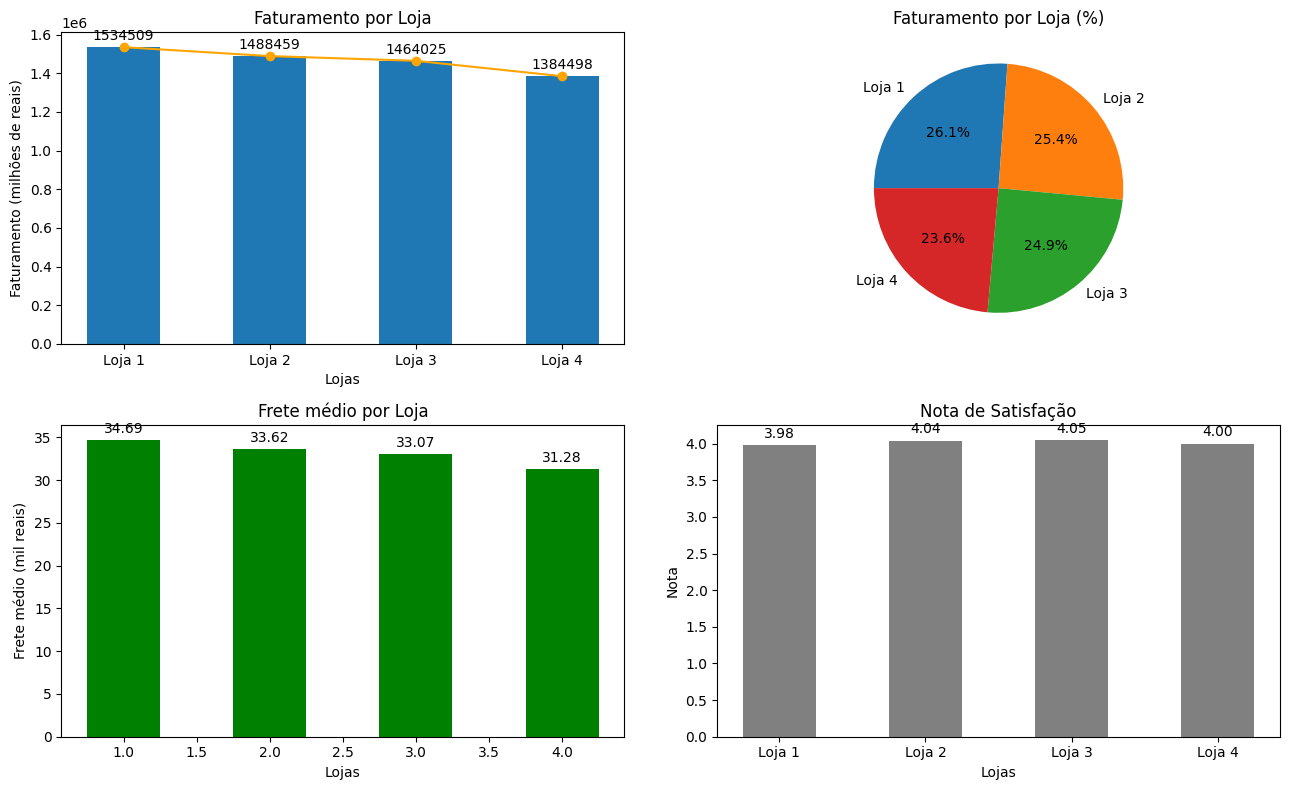

In [126]:
fig, axes = plt.subplots(2, 2, figsize=(13, 8)) # Cria uma grade 2x2 de subplots (4 gráficos) com um tamanho específico
axes = axes.flatten() # Achata o array 2D de eixos para facilitar a iteração sobre os subplots

# Gráfico de Barras e Linhas para Faturamento por Loja
bars0 = axes[0].bar(range(1,5), faturamento, width=0.5) # Cria um gráfico de barras para o faturamento
axes[0].plot(range(1,5), faturamento, color='Orange', marker='o') # Adiciona um gráfico de linha sobre as barras para faturamento
axes[0].set_xlabel('Lojas') # Define o rótulo do eixo X
axes[0].set_ylabel('Faturamento (milhões de reais)') # Define o rótulo do eixo Y
axes[0].set_title('Faturamento por Loja') # Define o título do subplot
axes[0].set_xticks(range(1,5), ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']) # Define os rótulos do eixo X para as lojas
axes[0].bar_label(bars0, fmt='%.0f', padding=3) # Adiciona rótulos de valor nas barras do faturamento

# Gráfico de Pizza para Faturamento por Loja (%)
axes[1].pie(faturamento, autopct='%1.1f%%', labels = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'], counterclock=False, startangle=180) # Cria um gráfico de pizza para o faturamento percentual
axes[1].set_title('Faturamento por Loja (%)') # Define o título do subplot

# Gráfico de Barras para Frete Médio por Loja
bars2 = axes[2].bar(range(1,5), media_frete, width=0.5, color='Green') # Cria um gráfico de barras para o frete médio
axes[2].set_xlabel('Lojas') # Define o rótulo do eixo X
axes[2].set_ylabel('Frete médio (mil reais)') # Define o rótulo do eixo Y
axes[2].set_title('Frete médio por Loja') # Define o título do subplot
axes[2].bar_label(bars2, fmt='%.2f', padding=3) # Adiciona rótulos de valor nas barras do frete médio

# Gráfico de Barras para Nota de Satisfação por Loja
bars3 = axes[3].bar(range(1,5), avaliacao, width=0.5, color='Grey') # Cria um gráfico de barras para a avaliação
axes[3].set_xlabel('Lojas') # Define o rótulo do eixo X
axes[3].set_ylabel('Nota') # Define o rótulo do eixo Y
axes[3].set_title('Nota de Satisfação') # Define o título do subplot
axes[3].bar_label(bars3, fmt='%.2f', padding=3) # Adiciona rótulos de valor nas barras da avaliação
axes[3].set_xticks(range(1,5), ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']) # Define os rótulos do eixo X para as lojas

plt.tight_layout(w_pad=3.0) # Ajusta o layout para evitar sobreposição entre os subplots, com padding horizontal
plt.show() # Exibe todos os gráficos

# Graficos - Vendas por categoria

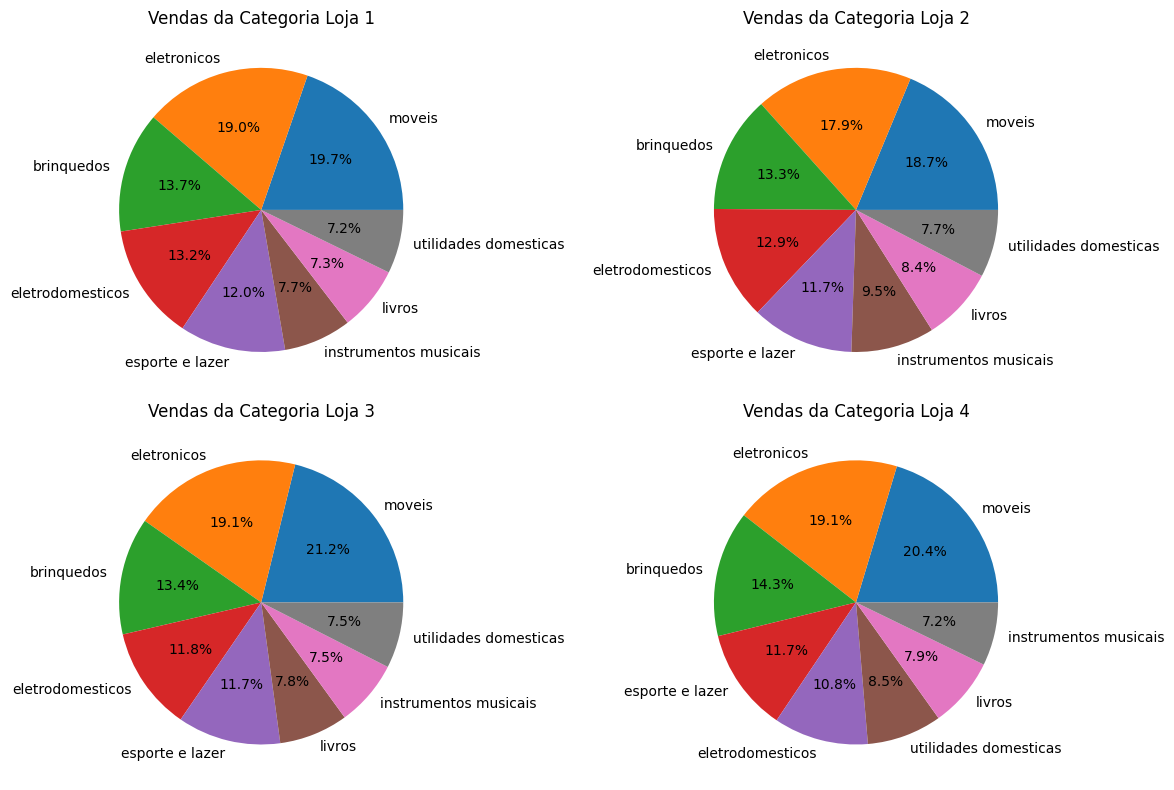

In [127]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8)) # Cria uma grade 2x2 de subplots
axes = axes.flatten() # Achata o array 2D de eixos para facilitar a iteração

for i, loja in enumerate(vendas_categoria):
  axes[i].pie(loja['Produto'], labels=vendas_categoria[i].index, autopct='%1.1f%%') # Cria um gráfico de pizza para as vendas por categoria
  axes[i].set_title(f'Vendas da Categoria Loja {i+1}') # Define o título para cada subplot

plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show() # Exibe todos os gráficos

# Graficos - Faturamento por categoria

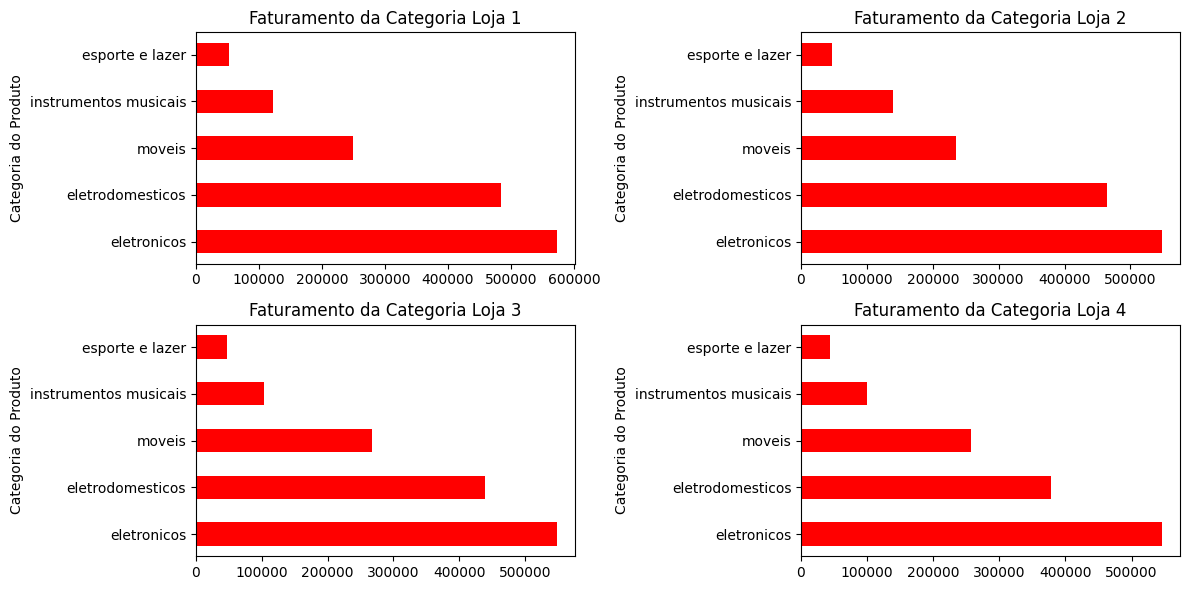

In [128]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6)) # Cria uma grade 2x2 de subplots
axes = axes.flatten() # Achata o array 2D de eixos para facilitar a iteração

for i, loja in enumerate(faturamento_categoria):
  axes[i].barh(loja['Preço'].head(5).index, loja['Preço'].head(5), height=0.5, color = 'Red') # Cria um gráfico de barras horizontais para os 5 maiores faturamentos por categoria
  axes[i].set_title(f'Faturamento da Categoria Loja {i+1}') # Define o título para cada subplot
  axes[i].set_ylabel('Categoria do Produto') # Define o rótulo do eixo Y
  axes[i].set_label('Faturamento') # Define o rótulo do eixo X

plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show() # Exibe todos os gráficos

# **Relatório**

Com base nos dados analisados, podemos fazer as seguintes observações sobre o desempenho das lojas:

*   **Faturamento:** A Loja 4 apresentou o menor faturamento total (`R$ 1.384.497,58`), ficando significativamente abaixo das outras lojas.
*   **Média de Avaliação da Compra:** A Loja 1 teve a menor média de satisfação dos clientes (`3.98`), enquanto as outras lojas ficaram ligeiramente acima.
*   **Frete Médio:** A Loja 4 registrou o menor frete médio (`R$ 31.28`), o que, embora seja um custo menor, pode estar associado a um menor volume de vendas ou a produtos de menor valor que geram menos receita.

Considerando o **faturamento total como o principal indicador de desempenho financeiro**, a **Loja 4** é a que apresenta o menor desempenho e, portanto, seria a principal candidata a ser fechada. Apesar de ter o frete médio mais baixo (o que poderia ser visto como positivo para o cliente ou para o custo operacional), seu volume de vendas e receita totais são os mais baixos, indicando uma performance geral mais fraca. A Loja 1, apesar de ter a menor avaliação de compra, ainda possui um faturamento superior ao da Loja 4.

# **Extra**

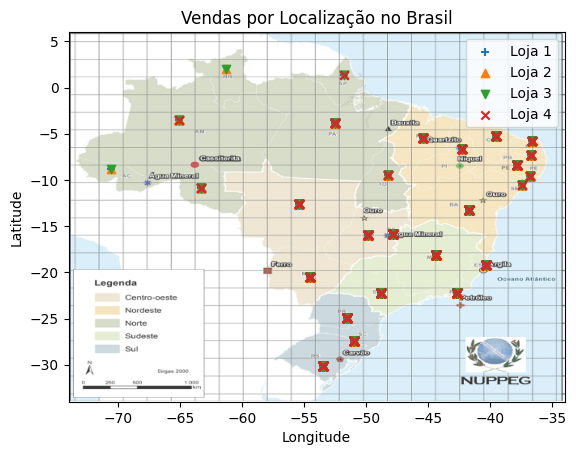

In [129]:
import matplotlib.image as mpimg # Importa a biblioteca para carregar imagens

img = mpimg.imread('mapa_brasil.PNG') # Carrega a imagem do mapa do Brasil a partir de um arquivo local

extent = [-74, -34, -34, 6] # Define a extensão geográfica para o mapa (longitude_min, longitude_max, latitude_min, latitude_max)

plt.imshow(img, extent=extent, aspect='auto', alpha=0.8) # Exibe a imagem do mapa como plano de fundo, com transparência

# Plota os pontos de venda de cada loja no mapa
plt.scatter(loja1['lon'],loja1['lat'], marker='+', label='Loja 1')
plt.scatter(loja2['lon'],loja2['lat'],marker='^', label='Loja 2')
plt.scatter(loja3['lon'],loja3['lat'], marker='v', label='Loja 3')
plt.scatter(loja4['lon'],loja4['lat'], marker='x', label='Loja 4')

plt.title('Vendas por Localização no Brasil') # Define o título do gráfico
plt.xlabel('Longitude') # Define o rótulo do eixo X
plt.ylabel('Latitude') # Define o rótulo do eixo Y
plt.legend() # Exibe a legenda para identificar as lojas
plt.show() # Exibe o gráfico